In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import sys; sys.path.insert(0, '../geoplot/')
import geoplot.crs as ccrs
import geoplot as gplt
import shapely
%matplotlib inline

In [98]:
# census_tracts = gpd.read_file("../data/boston_airbnb/Census2010_Tracts.shp")
# census_tracts = census_tracts.to_crs(epsg=4326)
listings = pd.read_csv("../geoplot/data/boston_airbnb/listings.csv")

In [99]:
boston_zip_codes = gpd.read_file("../geoplot/data/boston_airbnb/ZIPCODES_NT_POLY.shp")

In [100]:
airbnbs = listings[['latitude', 'longitude']].apply(lambda srs: Point(srs['longitude'], srs['latitude']), axis='columns')

In [101]:
listings = gpd.GeoDataFrame(data=listings, geometry=airbnbs)

In [102]:
listings['price'] = listings['price'].map(lambda p: p[1:].replace(".", "").replace(",", "") if (not isinstance(p, float)) else np.nan).astype(float)
listings['price'] = list(map(lambda p: float(p) / 100, listings['price']))

In [103]:
listings = listings[listings['price'].notnull()]

In [104]:
listings['zipcode'] = listings['zipcode'].map(lambda z: float(str(z).replace("-", "").split(" ")[0]))
listings = listings[listings['zipcode'].notnull()]

In [105]:
boston_zip_codes['POSTCODE'] = boston_zip_codes['POSTCODE'].map(lambda p: float(p[1:]) if p[0] == '0' else float(p))
boston_zip_codes = boston_zip_codes.drop_duplicates('POSTCODE')
boston_zip_codes = boston_zip_codes.set_index("POSTCODE")

In [106]:
listings = listings[~listings['zipcode'].isin([2218.0, 21341704.0])]

In [107]:
boston_zip_codes = boston_zip_codes.to_crs(epsg=4326)

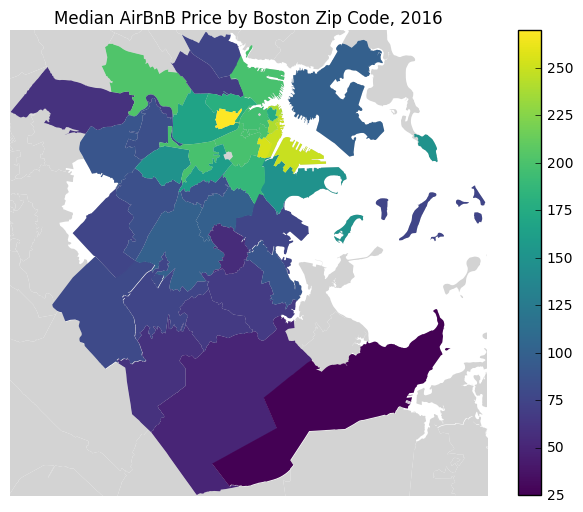

In [142]:
ax = gplt.polyplot(boston_zip_codes.geometry, projection=ccrs.AlbersEqualArea(), 
                   facecolor='lightgray', edgecolor='gray', linewidth=0)
gplt.aggplot(listings, projection=ccrs.AlbersEqualArea(), hue='price', 
             by='zipcode', geometry=boston_zip_codes.geometry, agg=np.median, ax=ax, 
             linewidth=0)
ax.set_title("Median AirBnB Price by Boston Zip Code, 2016")